# Logistic Regression Project
### By Rob Arao on March 17, 2018¶

In this project I will using multinomial NB to create 2 models to predict single words and tri-gram. The section will be divided as follows:

*    'I. Data Wrangling': creating working dataframe
*    'II. Story Telling': plots of word count and inferential statistics
*    'III. Text Preprocesssing': editing stopword list
*    'IV. Model 1 Developement': single word
*    'V. Model 2 Developement': tri-gram

In [1]:
import numpy as np
import pandas as pd
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nltk
#Need to download stopwords (d-(l)-stopwords-q) then comment out.
#nltk.download_shell()

<div class="span5 alert alert-info">
<h3>I. DATA WRANGLING</h3>

<ul>
  <li> <b>CREATE DATAFRAME:</b> Merge cases and controls together
        <ul> <b>assess missingness</b>,</ul>
  <li> <b>ADJUST DATETIME:</b> Extract Month-Year
  <li> <b>EDIT BLOB CONTENTS:</b> Remove unnecessary medication info and format characters
</ul>
</div>

In [3]:
BLOBS_cases=pd.read_excel("cases_blobs_03152018_noduplicates.xlsx",encoding="utf-8")
BLOBS_controls=pd.read_excel("controls_blobs_03152018_noduplicates.xlsx",encoding="utf-8")
casecontrols=pd.read_excel("Matched_Cases&Controls_2018-03-14.xlsx",encoding="utf-8")

In [4]:
df_cases_blobs=pd.merge(BLOBS_cases,casecontrols[['HMCID','FACILITY_CD','ADMIT_DTTM','EVENT_DTTM']], on='HMCID', how='left')
df_controls_blobs=pd.merge(BLOBS_controls,casecontrols[['HMCID','FACILITY_CD','ADMIT_DTTM','EVENT_DTTM']], on='HMCID', how='left')

In [5]:
df_combined_a=df_cases_blobs.append(df_controls_blobs, ignore_index=True)

In [112]:
df_combined_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 10 columns):
UPDT_CNT             6775 non-null float64
CLINICAL_EVENT_ID    6775 non-null float64
BLOB_CONTENTS        6775 non-null object
BLOB_SEQ_NUM         6775 non-null float64
EID                  6777 non-null object
HMCID                6777 non-null object
cases                6777 non-null int64
FACILITY_CD          6777 non-null object
ADMIT_DTTM           6777 non-null object
EVENT_DTTM           6777 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 529.5+ KB


In [6]:
df_combined_working=df_combined_a.dropna()

In [7]:
pd.crosstab(df_combined_working.cases, df_combined_working.FACILITY_CD, margins=True)

FACILITY_CD,HMC,UWMC,All
cases,,,
0,3401,521,3922
1,2388,465,2853
All,5789,986,6775


In [8]:
#Assess missingingness
df_combined_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6775 entries, 0 to 6775
Data columns (total 10 columns):
UPDT_CNT             6775 non-null float64
CLINICAL_EVENT_ID    6775 non-null float64
BLOB_CONTENTS        6775 non-null object
BLOB_SEQ_NUM         6775 non-null float64
EID                  6775 non-null object
HMCID                6775 non-null object
cases                6775 non-null int64
FACILITY_CD          6775 non-null object
ADMIT_DTTM           6775 non-null object
EVENT_DTTM           6775 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 582.2+ KB


In [9]:
#identifying which columns/rows has the missing values
df_combined_working.isnull().any()

UPDT_CNT             False
CLINICAL_EVENT_ID    False
BLOB_CONTENTS        False
BLOB_SEQ_NUM         False
EID                  False
HMCID                False
cases                False
FACILITY_CD          False
ADMIT_DTTM           False
EVENT_DTTM           False
dtype: bool

In [10]:
#double check to ensure nothing is in the blob content before excouding
df_missing=df_combined_working[df_combined_working.isnull().any(axis=1)]
df_missing.head()

,UPDT_CNT,CLINICAL_EVENT_ID,BLOB_CONTENTS,BLOB_SEQ_NUM,EID,HMCID,cases,FACILITY_CD,ADMIT_DTTM,EVENT_DTTM


# Based on above, there is no missing data

## In dealing with date time, will need to change the object into a datetime format.
For future analysis, will create just a Month-Year, and Year column for both ADMIT_DTTM and EVENT_DTTM

In [11]:
df_combined_working['ADMIT_DTTM'] =  pd.to_datetime(df_combined_working['ADMIT_DTTM'],format='%d%b%y:%H:%M:%S')
df_combined_working['EVENT_DTTM'] =  pd.to_datetime(df_combined_working['EVENT_DTTM'],format='%d%b%y:%H:%M:%S')
df_combined_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6775 entries, 0 to 6775
Data columns (total 10 columns):
UPDT_CNT             6775 non-null float64
CLINICAL_EVENT_ID    6775 non-null float64
BLOB_CONTENTS        6775 non-null object
BLOB_SEQ_NUM         6775 non-null float64
EID                  6775 non-null object
HMCID                6775 non-null object
cases                6775 non-null int64
FACILITY_CD          6775 non-null object
ADMIT_DTTM           6775 non-null datetime64[ns]
EVENT_DTTM           6775 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 582.2+ KB


C:\Users\arao2\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\arao2\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
#extract year
df_combined_working['event_year'] = df_combined_working['EVENT_DTTM'].dt.year
df_combined_working['event_month'] = df_combined_working['EVENT_DTTM'].dt.month
df_combined_working['event_monyr'] = df_combined_working['EVENT_DTTM'].apply(lambda x: x.strftime('%B-%Y')) 

df_combined_working['admit_year'] = df_combined_working['ADMIT_DTTM'].dt.year
df_combined_working['admit_month'] = df_combined_working['ADMIT_DTTM'].dt.month
df_combined_working['admit_monyr'] = df_combined_working['ADMIT_DTTM'].apply(lambda x: x.strftime('%B-%Y')) 

C:\Users\arao2\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\arao2\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\arao2\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [13]:
df_combined_working.head(3)

,UPDT_CNT,CLINICAL_EVENT_ID,BLOB_CONTENTS,BLOB_SEQ_NUM,EID,HMCID,cases,FACILITY_CD,ADMIT_DTTM,EVENT_DTTM,event_year,event_month,event_monyr,admit_year,admit_month,admit_monyr
0,1.0,3.918091e+09,\n \n \nID/CC \n25 yo male with no know prior...,1.0,86e72698-9126-11e4-9435-00155dfb8959,H3679043,1,HMC,2015-01-08 09:36:00,2015-01-08 15:20:00,2015,1,January-2015,2015,1,January-2015
1,2.0,3.908087e+09,\n \n \nID/CC \nJackson is a 25 year old male...,1.0,4320febf-91b7-11e4-9435-00155dfb8959,H3660100,1,HMC,2015-01-01 05:07:00,2015-01-01 17:20:00,2015,1,January-2015,2015,1,January-2015
2,1.0,3.907800e+09,\n \n \nID/CC \n33 year old male with signifi...,1.0,e0d430f8-91b0-11e4-9435-00155dfb8959,H2217426,1,HMC,2015-01-01 04:22:00,2015-01-01 11:06:00,2015,1,January-2015,2015,1,January-2015


In [14]:
#in order to assess length, need to change 'blob contents' 
#into string. Create an iteration to do for each row entry.
df_combined_working['blob_string']=df_combined_working['BLOB_CONTENTS'].astype('str') 

C:\Users\arao2\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [15]:
#remove the \n, \t, \'
df_combined_working = df_combined_working.replace('\n','', regex=True)
df_combined_working = df_combined_working.replace('\t','', regex=True)
df_combined_working = df_combined_working.replace('\'','', regex=True)

In [16]:
#REPLACE LIST OF WORDS
df_combined_working = df_combined_working.replace('time *evaluation','timeevaluation', regex=True)
df_combined_working = df_combined_working.replace('consult *history','consulhistory', regex=True)
df_combined_working = df_combined_working.replace('time *consult','timeconsult', regex=True)
df_combined_working = df_combined_working.replace('hours *yes','hoursyes', regex=True)
df_combined_working = df_combined_working.replace('mins *present','minspresent', regex=True)
df_combined_working = df_combined_working.replace('consult *illness','consultillness', regex=True)
df_combined_working = df_combined_working.replace('patient *within','patientwithin', regex=True)


#EXCLUDE MEDICINE INFO
df_combined_working.blob_string.replace("Results Review.*Problem List", "", regex=True, inplace=True)

In [17]:
#create a new columm with length of string content
df_combined_working['length']=df_combined_working['blob_string'].apply(len)

In [18]:
df_combined_working['length'].describe()

count     6775.000000
mean      9474.027601
std       6097.818108
min          2.000000
25%       4710.500000
50%       8605.000000
75%      12710.000000
max      32462.000000
Name: length, dtype: float64

<div class="span5 alert alert-info">
<h3>II. STORY TELLING</h3>

<ul>
  <li> <b>CREATE PLOTS:</b> Cases vs Controls
        <ul> <b>Histogram</b>,</ul>
        <ul> <b>Line plot (over time)</b>,</ul>
        <ul> <b>Boxplot</b>,</ul>
  <li> <b>Inferential Statistics:</b> mean length with 95%CI
          <ul> <b>Cases vs. Controls</b>,</ul>
          <ul> <b>HMC vs. UW</b>,</ul>
</ul>
</div>

In [19]:
#check type of datasets to see why you have to make into string.
#i.e. right now, they are as an object.
df_combined_working['blob_string'].dtype

dtype('O')

In [20]:
#Check the number of rows
df_combined_working['blob_string'].describe()

count                                                  6775
unique                                                 6775
top          VISIT INFORMATION: OR Date: 5/3/2017 . Diag...
freq                                                      1
Name: blob_string, dtype: object

In [21]:
print(df_combined_working.shape)

(6775, 18)


In [22]:
#make histogram of length for comparison
#Been having a problem re-organizing order of histogram.  Will try to create a new 
# category and try to re-order and plot.  Will do this by a) creating a function
# and b) applying the function. 

#a) Function to create a new numerical category
def newCategory (row):
    if row['cases']==0:
        return ' Control'
    if row['cases']==1:
        return 'Case'

#b) apply above function
df_combined_working['numCat'] = df_combined_working.apply (lambda row: newCategory (row),axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001478C32D358>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001478DBE7EF0>], dtype=object)

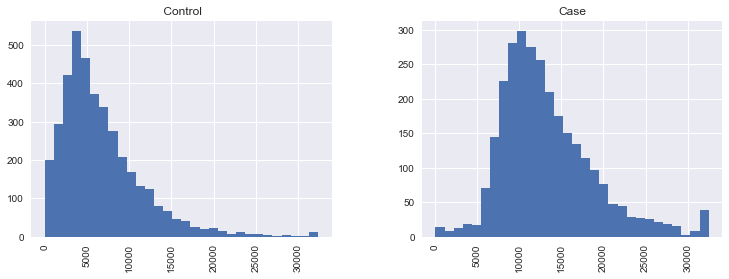

In [23]:
#Plot histogram
import seaborn as sns
%matplotlib inline
df_combined_working.sort_values(by='numCat', ascending=False)
df_combined_working.hist(column="length",by="numCat",bins=30, figsize=(12,4))

## The above shows that cases have more word counts.  Will superimpose the two histograms.

In [24]:
#superimposing histogram
df_contrl=df_combined_working.loc[df_combined_working['cases']==0,['ADMIT_DTTM','cases','length']]
df_case=df_combined_working.loc[df_combined_working['cases']==1,['ADMIT_DTTM','cases','length']]

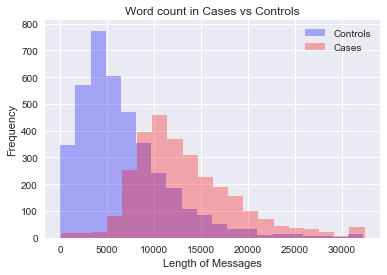

In [25]:
df_contrl['length'].plot(kind='hist', bins=20, alpha=.3,color='blue')
df_case['length'].plot(kind='hist', bins=20, alpha=.3,color='red')
plt.title('Word count in Cases vs Controls')
plt.legend(["Controls", "Cases"])
plt.xlabel('Length of Messages')
plt.savefig('C:/Users/arao2/Documents/Special Projects/EHR Case Finding/03142018/word_count.png', bbox_inches="tight")
plt.show()

In [26]:
#CREATE LINEPLOT OVER TIME
df_dateIndex=df_combined_working.set_index('admit_monyr')

In [27]:
df_contrl_resample=df_contrl.resample('M',on='ADMIT_DTTM').mean()
df_case_resample=df_case.resample('M',on='ADMIT_DTTM').mean()

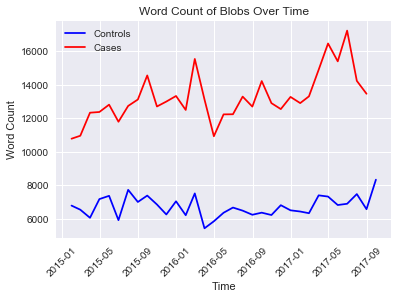

In [28]:
fig, ax= plt.subplots()
ax.plot(df_contrl_resample.length, color='b') #plot controls as blue
ax.plot(df_case_resample.length, color='r')   #plot cases as red
#ax.grid(b=False)

plt.xticks(rotation=45)

ax.set_title('Word Count of Blobs Over Time')
ax.set_ylabel('Word Count')
ax.set_xlabel('Time')
ax.legend(["Controls", "Cases"])

plt.savefig('C:/Users/arao2/Documents/Special Projects/EHR Case Finding/03142018/time_trend.png', bbox_inches="tight")


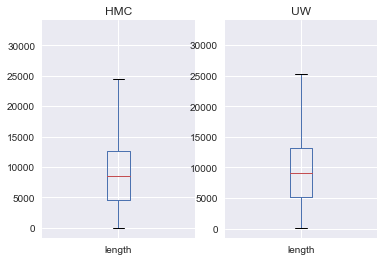

In [29]:
#CREATE BOXPLOT by FACILITY_CD
fig, axes = plt.subplots(nrows=1, ncols=2)

df_combined_working.loc[df_combined_working['FACILITY_CD'] =='HMC'].plot(ax=axes[0], y='length', kind='box',title='HMC')
df_combined_working.loc[df_combined_working['FACILITY_CD'] == 'UWMC'].plot(ax=axes[1], y='length', kind='box',title='UW')
plt.show()

# INFERENTIAL STATISTICS

In [30]:
#95%CI
def ci_i (ci,mean,n,std):
    """
    Input:
    Output: 2 tailed confidence interval (95% or 99%)
    Note: assumes only 100 DF
    """
    if ci==95:
        limit=1.984*(std/((n)**(.5)))
        return (mean-limit,mean+limit)
    elif ci==99:
        limit=2.626*(std/((n)**(.5)))
        return (mean-limit,mean+limit)
    else:
        print("Error")

In [31]:
grouped_data = df_combined_working.groupby(['numCat'])
grouped_data['length'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
numCat,,,,,,,,
Control,3922.0,6678.819990,4843.769299,2.0,3349.25,5480.0,8776.25,32335.0
Case,2853.0,13316.580792,5526.833818,90.0,9585.00,12203.0,16163.00,32462.0


In [32]:
l1,u1=ci_i(95,6678.82,3922,4843.8)
l2,u2=ci_i(95,13316.58,2853,5526.8)

print("The mean word count for the controls was 6,678.8 with  95%CI of ({:.1f},{:.1f})".format(l1, u1))
print("The mean word count for the cases was 13,316.6 with  95%CI of ({:.1f},{:.1f})".format(l2, u2))

The mean word count for the controls was 6,678.8 with  95%CI of (6525.4,6832.3)
The mean word count for the cases was 13,316.6 with  95%CI of (13111.3,13521.9)


In [33]:
grouped_data = df_combined_working.groupby(['FACILITY_CD'])
grouped_data['length'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
FACILITY_CD,,,,,,,,
HMC,5789.0,9438.530143,6162.420109,2.0,4651.0,8482.0,12621.0,32462.0
UWMC,986.0,9682.440162,5702.292008,118.0,5250.5,9103.5,13262.0,32431.0


In [34]:
l1,u1=ci_i(95,9438.530143,5789,6162.420109)
l2,u2=ci_i(95,9682.440162,986,5702.292008)

print("The mean word count for HMC was 9,438.5 with  95%CI of ({:.1f},{:.1f})".format(l1, u1))
print("The mean word count for UW was 9,682.4 with  95%CI of ({:.1f},{:.1f})".format(l2, u2))

The mean word count for HMC was 9,438.5 with  95%CI of (9277.8,9599.2)
The mean word count for UW was 9,682.4 with  95%CI of (9322.1,10042.7)


## SUMMARY: The non-overlapping 95% CI suggests that there is a significant difference in mean word count between controls vs. cases, and between the FACILITY_CDs HMC vs UW.

In [35]:
pd.crosstab(df_combined_working.admit_year, df_combined_working.numCat, margins=True)

numCat,Control,Case,All
admit_year,,,
2015,1384,1059,2443
2016,1454,987,2441
2017,1084,807,1891
All,3922,2853,6775


In [36]:
pd.crosstab(df_combined_working.admit_year, df_combined_working.FACILITY_CD, margins=True)

FACILITY_CD,HMC,UWMC,All
admit_year,,,
2015,2222,221,2443
2016,2176,265,2441
2017,1391,500,1891
All,5789,986,6775


<div class="span5 alert alert-info">
<h3>III. TEXT PRE-PROCESSING</h3>

<ul>
  <li> <b>EDIT STOPWORDS:</b> Create a function where I can add to list
  <li> <b>Create a function that will implement the following:</b>
        <ul> <b>apply stopword list</b>,</ul>
        <ul> <b>remove punctuation</b>,</ul>
        <ul> <b>return new column so as not to affect original</b>,</ul>

</ul>
</div>

# CUSTOMIZING STOPWORDS:
    1. Add any extra words to stopword dictionary

In [37]:
from nltk.corpus import stopwords
import string

In [38]:
#1. Adding new words to set called newWords, then append to library
stopwords=nltk.corpus.stopwords.words('english')
newWords=["idcc",'a','is','timeevaluation','consulhistory','timeconsult','hoursyes','minspresent','consultillness', \
          'patientwithin','weekendholiday','patient' ,'psychiatry consulted','patient evaluation','consult hours', \
          'evaluated within','3160','mins','5000unitsml','5000','25mg','2mg','86mg','17g','3350nf','200mg', \
          'psychiatry','dailyinfusionsno','recommend'
         ]
stopwords.extend(newWords)

In [39]:
#make histogram of length for comparison
#Been having a problem re-organizing order of histogram.  Will try to create a new 
# category and try to re-order and plot.  Will do this by a) creating a function
# and b) applying the function. 

#a) Function to create a new numerical category
def newCategory (row):
    if row['cases']==0:
        return ' Control'
    if row['cases']==1:
        return 'Case'

#b) apply above function
df_combined_working['numCat'] = df_combined_working.apply (lambda row: newCategory (row),axis=1)

## PROCESSING TEXT

In [40]:

#TEXT_PROCESS
def text_process(mess):
    """
    1. remove punctuation
    2. remove stopwords
    3. return list of clean text words
    """

    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords]

In [41]:
df_combined_working['message']=df_combined_working['blob_string'].apply(text_process).apply(', '.join)

In [42]:
df_combined_working.head(2)

,UPDT_CNT,CLINICAL_EVENT_ID,BLOB_CONTENTS,BLOB_SEQ_NUM,EID,HMCID,cases,FACILITY_CD,ADMIT_DTTM,EVENT_DTTM,event_year,event_month,event_monyr,admit_year,admit_month,admit_monyr,blob_string,length,numCat,message
0,1.0,3.918091e+09,ID/CC 25 yo male with no know prior history...,1.0,86e72698-9126-11e4-9435-00155dfb8959,H3679043,1,HMC,2015-01-08 09:36:00,2015-01-08 15:20:00,2015,1,January-2015,2015,1,January-2015,ID/CC 25 yo male with no know prior history...,7834,Case,"25, yo, male, know, prior, history, mandibular..."
1,2.0,3.908087e+09,ID/CC Jackson is a 25 year old male admitte...,1.0,4320febf-91b7-11e4-9435-00155dfb8959,H3660100,1,HMC,2015-01-01 05:07:00,2015-01-01 17:20:00,2015,1,January-2015,2015,1,January-2015,ID/CC Jackson is a 25 year old male admitte...,12538,Case,"Jackson, 25, year, old, male, admitted, overni..."


<div class="span5 alert alert-info">
<h3>IV. MODEL 1 DEVELOPEMENT-Single Words</h3>

<ul>
  <li> <b>Split into test and train:</b> 70% of data will be used as train
  <li> <b>K fold cross-validation:</b> kfold=5
  <li> <b>Find alpha and best_min_df</b> 
  <li> <b>Assess Model:</b> 
        <ul> <b>Accuracy</b>,</ul>
        <ul> <b>Confusion Matrix</b>,</ul>
        <ul> <b>Classification Report</b>,</ul>
  <li> <b>Produce List of top 10 words</b>
  <li> <b>Produce List of worse 10 words</b>
  <li> <b>Assess the poorly predicted messages:</b> 
        <ul> <b>May have to print out message. Do not show due to HIPAA</b>,</ul>
</ul>
</div>

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [44]:
_, itest = train_test_split(range(df_combined_working.shape[0]), train_size=0.7)
mask = np.zeros(df_combined_working.shape[0], dtype=np.bool)
mask[itest] = True

In [45]:

def make_xy(df_combined_working, vectorizer=None):
      
    if vectorizer is None:
        vectorizer = CountVectorizer(ngram_range=(1,1))
    X = vectorizer.fit_transform(df_combined_working.message)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (df_combined_working.numCat == 'Case').values.astype(np.int)
    return X, y
X, y = make_xy(df_combined_working)

In [46]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

C:\Users\arao2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [47]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    control = y == 0
    case = ~control
    return prob[control, 0].sum() + prob[case, 1].sum()

In [48]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(range(df_combined_working.shape[0]), train_size=0.7)
mask=np.ones(df_combined_working.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [49]:

#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df_combined_working, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df
            
print ("alpha: %f " % best_alpha)
print ("min_df: %f " % best_min_df)

alpha: 50.000000 
min_df: 0.100000 


In [50]:
#single words
vectorizer = CountVectorizer(min_df=best_min_df,ngram_range=(1,1))
X, y = make_xy(df_combined_working, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=alpha).fit(xtrain, ytrain)

#Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.885280
Accuracy on test data:     0.876045


In [103]:
print (classification_report(ytrain,clf.predict(xtrain))) #confusion matrix for training data

             precision    recall  f1-score   support

          0       1.00      0.77      0.87      2754
          1       0.76      1.00      0.86      1988

avg / total       0.90      0.87      0.87      4742



In [51]:
from sklearn.metrics import classification_report
print (classification_report(ytest,clf.predict(xtest)))#confusion matrix for test data

             precision    recall  f1-score   support

          0       0.99      0.80      0.88      1207
          1       0.77      0.99      0.87       826

avg / total       0.90      0.88      0.88      2033



In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, clf.predict(xtest)))

[[961 246]
 [  6 820]]


In [53]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:50]]
bad_words = words[ind[-50:]]

good_prob = probs[ind[:50]]
bad_prob = probs[ind[-50:]]

print("Good words\t     P(PsychConsult | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(PsychConsult | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(PsychConsult | word)
            delirium 0.95
              sitter 0.94
             consult 0.91
                page 0.87
           interview 0.87
              safety 0.85
          restraints 0.84
                 ama 0.84
            maintain 0.83
             attempt 0.82
         involuntary 0.81
           agitation 0.81
                 avh 0.81
           obtaining 0.81
               range 0.80
          collateral 0.80
               leave 0.80
            foundprn 0.79
          frequently 0.79
          depressive 0.79
           attentive 0.79
           judgement 0.79
                 1mg 0.78
           attention 0.78
           consulted 0.77
     recommendations 0.77
                 ita 0.76
           stressors 0.76
                 saw 0.76
         unspecified 0.75
              assess 0.75
            continue 0.74
               psych 0.74
           delusions 0.74
              linear 0.73
                team 0.73
            attempts 0.73

In [113]:
#Commented this out due to sensitive PHI
#x, y = make_xy(df_combined_working, vectorizer)

#prob = clf.predict_proba(x)[:, 0]
#predict = clf.predict(x)

#bad_control = np.argsort(prob[y == 0])[:5]
#bad_case = np.argsort(prob[y == 1])[-5:]

#print("Mis-predicted control quotes")
#print('---------------------------')
#for row in bad_control:
#    print(df_combined_working[y == 0].blob_string.iloc[row])
#    print("")

#print("Mis-predicted case quotes")
#print('--------------------------')
#for row in bad_case:
#    print(df_combined_working[y == 1].blob_string.iloc[row])
#    print("")

In [56]:
clf.predict_proba(vectorizer.transform(['abuse']))

array([[ 0.42826079,  0.57173921]])

<div class="span5 alert alert-info">
<h3>V. MODEL 2 DEVELOPEMENT: Tri-grams</h3>

<ul>
  <li> <b>same as above, but specifiy using trigram:</b> i.e. use ngram_range=(3,3)
</ul>
</div>

In [104]:
def make_xy(df_combined_working, vectorizer=None):
        
    if vectorizer is None:
        vectorizer = CountVectorizer(ngram_range=(3,3))
    X = vectorizer.fit_transform(df_combined_working.message)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (df_combined_working.numCat == 'Case').values.astype(np.int)
    return X, y
X, y = make_xy(df_combined_working)

In [105]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [106]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    control = y == 0
    case = ~control
    return prob[control, 0].sum() + prob[case, 1].sum()

In [107]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(range(df_combined_working.shape[0]), train_size=0.7)
mask=np.ones(df_combined_working.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [108]:
#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df_combined_working, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df
            
print ("alpha: %f " % best_alpha)
print ("min_df: %f " % best_min_df)

alpha: 50.000000 
min_df: 0.100000 


In [111]:
#three words (tri-gram)
vectorizer = CountVectorizer(min_df=best_min_df,ngram_range=(3,3))
X, y = make_xy(df_combined_working, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=alpha).fit(xtrain, ytrain)

#Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.902362
Accuracy on test data:     0.905558


In [110]:
from sklearn.metrics import classification_report
print (classification_report(ytrain,clf.predict(xtrain)))#confusion matrix for training data

             precision    recall  f1-score   support

          0       0.99      0.84      0.91      2740
          1       0.82      0.99      0.90      2002

avg / total       0.92      0.90      0.90      4742



In [63]:
from sklearn.metrics import classification_report
print (classification_report(ytest,clf.predict(xtest)))#confusion matrix for test data

             precision    recall  f1-score   support

          0       0.99      0.84      0.91      1173
          1       0.82      0.99      0.90       860

avg / total       0.92      0.91      0.91      2033



In [64]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, clf.predict(xtest)))

[[989 184]
 [  5 855]]


In [65]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:50]]
bad_words = words[ind[-50:]]

good_prob = probs[ind[:50]]
bad_prob = probs[ind[-50:]]

print("Good words\t     P(PsychConsult | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(PsychConsult | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(PsychConsult | word)
time consult request 0.96
consult request evaluation 0.96
prn past psychiatric 0.95
ita involuntary treatment 0.94
hours history present 0.94
consult hours history 0.94
request evaluation evaluated 0.94
evaluation evaluated within 0.94
involuntary treatment assessment 0.93
emergency department ita 0.92
department ita involuntary 0.92
request evaluation consult 0.92
evaluation consult requested 0.92
physical examination appearance 0.91
   consult hours yes 0.91
allergies nka medications 0.90
   hours yes history 0.90
 yes history present 0.90
difficulty obtaining history 0.90
treatment assessment referred 0.90
denies symptoms allergies 0.90
physical examination mental 0.90
examination mental status 0.90
nka medications scheduled 0.90
    90 consult hours 0.89
visit information admitted 0.89
 evaluated within 90 0.89
   within 90 consult 0.88
status examination appearance 0.88
 medical record time 0.88
 record time consult 0.88
evaluated within cons

# ASSESSING THE SELECTED a priori LIST

In [66]:
clf.predict_proba(vectorizer.transform(['suicide attempt']))

array([[ 0.5797132,  0.4202868]])

In [67]:
clf.predict_proba(vectorizer.transform(['verbal abuse']))

array([[ 0.5797132,  0.4202868]])

In [68]:
clf.predict_proba(vectorizer.transform(['physical abuse']))

array([[ 0.5797132,  0.4202868]])

In [69]:
clf.predict_proba(vectorizer.transform(['sexual abuse']))

array([[ 0.5797132,  0.4202868]])

In [70]:
clf.predict_proba(vectorizer.transform(['witness to']))

array([[ 0.5797132,  0.4202868]])

In [71]:
clf.predict_proba(vectorizer.transform(['parents separated']))

array([[ 0.5797132,  0.4202868]])

In [72]:
clf.predict_proba(vectorizer.transform(['firearm related']))

array([[ 0.5797132,  0.4202868]])

In [73]:
clf.predict_proba(vectorizer.transform(['overdose related']))

array([[ 0.5797132,  0.4202868]])

In [74]:
clf.predict_proba(vectorizer.transform(['abuse']))

array([[ 0.5797132,  0.4202868]])

In [75]:
clf.predict_proba(vectorizer.transform(['family mental illness']))

array([[ 0.5797132,  0.4202868]])

In [76]:
clf.predict_proba(vectorizer.transform(['substance use disorder']))

array([[ 0.5797132,  0.4202868]])

In [77]:
clf.predict_proba(vectorizer.transform(['loss of consciousness']))

array([[ 0.5797132,  0.4202868]])

In [78]:
clf.predict_proba(vectorizer.transform(['out of control behavior']))

array([[ 0.5797132,  0.4202868]])

In [79]:
clf.classes_

array([0, 1])

<div class="span5 alert alert-info">
<h3>VI. MODEL 3 DEVELOPEMENT: N-grams</h3>

<ul>
  <li> <b>same as above, but specifiy using wide range:</b> i.e. use ngram_range=(1,4)
</ul>
</div>

In [114]:
def make_xy(df_combined_working, vectorizer=None):
       
    if vectorizer is None:
        vectorizer = CountVectorizer(ngram_range=(1,4))
    X = vectorizer.fit_transform(df_combined_working.message)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (df_combined_working.numCat == 'Case').values.astype(np.int)
    return X, y
X, y = make_xy(df_combined_working)

In [115]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [116]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    control = y == 0
    case = ~control
    return prob[control, 0].sum() + prob[case, 1].sum()

In [117]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(range(df_combined_working.shape[0]), train_size=0.7)
mask=np.ones(df_combined_working.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [119]:
#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(df_combined_working, vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
       
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df
            
print ("alpha: %f " % best_alpha)
print ("min_df: %f " % best_min_df)

alpha: 50.000000 
min_df: 0.100000 


In [122]:
#4-gram as range
vectorizer = CountVectorizer(min_df=best_min_df,ngram_range=(1,4))
X, y = make_xy(df_combined_working, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=alpha).fit(xtrain, ytrain)

#Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.864825
Accuracy on test data:     0.861289


In [121]:
from sklearn.metrics import classification_report
print (classification_report(ytrain,clf.predict(xtrain)))#confusion matrix for training data

             precision    recall  f1-score   support

          0       1.00      0.76      0.86      1177
          1       0.75      1.00      0.86       856

avg / total       0.90      0.86      0.86      2033



In [86]:
from sklearn.metrics import classification_report
print (classification_report(ytest,clf.predict(xtest)))#confusion matrix for test data

             precision    recall  f1-score   support

          0       0.99      0.76      0.86      1168
          1       0.76      0.99      0.86       865

avg / total       0.89      0.86      0.86      2033



In [87]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, clf.predict(xtest)))

[[893 275]
 [  6 859]]


In [88]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:50]]
bad_words = words[ind[-50:]]

good_prob = probs[ind[:50]]
bad_prob = probs[ind[-50:]]

print("Good words\t     P(PsychConsult | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(PsychConsult | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(PsychConsult | word)
        time consult 0.96
  request evaluation 0.96
time consult request 0.96
consult request evaluation 0.96
time consult request evaluation 0.96
       consult hours 0.96
    evaluated within 0.95
     consult request 0.95
            delirium 0.95
              sitter 0.94
            prn past 0.94
prn past psychiatric 0.94
prn past psychiatric history 0.94
examination appearance 0.93
       hours history 0.93
hours history present illness 0.93
hours history present 0.93
consult hours history 0.93
consult hours history present 0.93
     ita involuntary 0.93
evaluation evaluated 0.93
ita involuntary treatment 0.93
ita involuntary treatment assessment 0.93
evaluation evaluated within 0.93
request evaluation evaluated within 0.93
request evaluation evaluated 0.93
consult request evaluation evaluated 0.93
           11 sitter 0.93
treatment assessment 0.92
involuntary treatment 0.92
involuntary treatment assessment 0.92
             consult 0.91
  

# ASSESSING THE GIVEN LIST

In [89]:
clf.predict_proba(vectorizer.transform(['abuse']))

array([[ 0.42277845,  0.57722155]])

In [90]:
clf.predict_proba(vectorizer.transform(['suicide attempt']))

array([[ 0.01082094,  0.98917906]])

In [91]:
clf.predict_proba(vectorizer.transform(['verbal abuse']))

array([[ 0.42277845,  0.57722155]])

In [92]:
clf.predict_proba(vectorizer.transform(['physical abuse']))

array([[ 0.54149844,  0.45850156]])

In [93]:
clf.predict_proba(vectorizer.transform(['sexual abuse']))

array([[ 0.42277845,  0.57722155]])

In [94]:
clf.predict_proba(vectorizer.transform(['witness to']))

array([[ 0.58076761,  0.41923239]])

In [95]:
clf.predict_proba(vectorizer.transform(['parents separated']))

array([[ 0.43639326,  0.56360674]])

In [96]:
clf.predict_proba(vectorizer.transform(['firearm related']))

array([[ 0.4157419,  0.5842581]])

In [97]:
clf.predict_proba(vectorizer.transform(['overdose related']))

array([[ 0.4157419,  0.5842581]])

In [98]:
clf.predict_proba(vectorizer.transform(['family mental illness']))

array([[ 0.30565385,  0.69434615]])

In [99]:
clf.predict_proba(vectorizer.transform(['substance use disorder']))

array([[ 0.01185301,  0.98814699]])

In [100]:
clf.predict_proba(vectorizer.transform(['loss of consciousness']))

array([[ 0.66505258,  0.33494742]])

In [101]:
clf.predict_proba(vectorizer.transform(['out of control behavior']))

array([[ 0.45035494,  0.54964506]])

In [102]:
clf.classes_

array([0, 1])